In [1]:
from heapq import heappush, heappop
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 3 2 2 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1]
[1 1 3 2 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1]
[1 1 1 3 1 2 1 0 1 1 1 1 1 0 0 0 0 1 0 1]
[1 0 1 2 3 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1]
[1 1 0 1 3 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1]
[1 0 0 1 2 3 1 1 0 1 0 0 0 0 0 1 0 1 1 1]
[1 1 0 1 2 2 3 2 1 0 0 1 1 0 0 1 1 0 0 1]
[1 1 1 1 1 2 2 3 2 1 1 0 0 0 1 1 1 0 1 1]
[1 0 0 1 0 0 1 1 3 2 1 1 0 1 1 0 0 1 1 1]
[1 1 0 1 1 0 0 2 2 3 2 2 1 1 0 0 0 0 0 1]
[1 0 1 1 1 0 1 0 1 1 3 2 2 1 1 0 0 0 1 1]
[1 0 0 1 1 0 0 1 1 2 1 3 2 2 2 0 0 0 0 1]
[1 0 0 0 1 1 0 0 1 1 1 1 3 2 1 0 1 1 0 1]
[1 1 1 1 0 1 0 0 0 1 0 1 3 1 1 0 0 0 0 1]
[1 1 1 1 1 0 1 1 1 1 1 2 1 3 1 1 1 1 0 1]
[1 1 1 1 0 1 0 0 1 0 0 1 2 1 3 3 2 2 0 1]
[1 0 1 1 1 0 0 1 1 1 0 0 1 1 2 1 3 1 2 1]
[1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 2 1 3 3 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


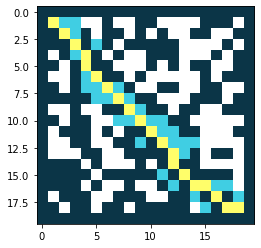

In [2]:
from heapq import heappush, heappop
import numpy as np
import random

# 1. Generar Matriz
# m_size es el tamaño del laberinto que puede ser dinámico
m_size = 20

# Esta funcion genera una matriz con paredes en los bordes
def generate_matrix(n):
    mat = [ [ 0 for i in range(n) ] for j in range(n) ]
    for i in range(len(mat)):
        for j in range(len(mat[i])):
            if(i == 0 or j == 0 or i == n - 1 or j == n - 1):
                mat[i][j] = 1
    return mat

mat = generate_matrix(m_size)

# 2. Generar Laberinto

# Esta funcion genera una coordenada
def gen_coord(choice, actual):
    if(choice == 0):
        return (actual[0]+1, actual[1])
    if(choice == 1):
        return (actual[0], actual[1]+1)

# Esta funcion valida que la coordenada aleatoria no sea pared
def valid_choice(choice, actual, mat):
    if(choice == 0):
        if(mat[actual[0]+1][actual[1]] == 0):
            return True
        else:
            return False
    elif(choice == 1):
        if(mat[actual[0]][actual[1]+1] == 0):
            return True
        else:
            return False

# Esta funcion genera un laberinto aleatorio con al menos 1 solución
def generate_labyrinth(start, end, matrix):
    actual = start
    mat = np.array(matrix)
    mat[start[0]][start[1]] = 2
    
    while actual != end:
        choice = random.randint(0, 1)
        if(valid_choice(choice, actual, matrix)):
            actual = gen_coord(choice, actual)
            mat[actual[0]][actual[1]] = 2
    
    for i in range(len(mat)):
        for j in range(len(mat[i])):
            if(mat[i][j] != 2 and mat[i][j] != 1):
                choice = random.randint(0, 1)
                mat[i][j] = choice
    
    # ans = np.copy(mat)

    for i in range(len(mat)):
        for j in range(len(mat[i])):
            if(mat[i][j] == 2):
                mat[i][j] = 0

    return mat

endcoord = (len(mat)-2, len(mat)-2)

lab = generate_labyrinth((1,1),endcoord,mat)
# lab = mat

n = len(lab)

h_ini = [ [ 0 for i in range(n) ] for j in range(n) ]

# Esta funcion genera una heurística en base a una matriz
def din_h(coordF, mat):
    x, y = coordF
    h = mat
    col=len(h)
    row=len(h[0])
    for i in range(row):
        for j in range(col):
            if i == 0 or i == row-1:
                h[i][j] = -1
            elif j == 0 or j == col-1:
                h[i][j] = -1
            else:
                h[i][j] = (abs(i-x) + abs(j-y))*10

    return h

endcoord = (len(mat)-2, len(mat)-2)

h = din_h(endcoord, h_ini)

start = (1,1)
end = endcoord

# Esta funcion valida que la coordenada generada no sea pared
def valid_coordinate(coord, mat):
    X, Y = coord
    if(mat[X][Y] != 1):
        return True
    return False

# Esta funcion genera una lista de hijos diagonales adyacentes al nodo visitado
def diagonal_children(coord, mat):
    # Only the 4 diagonal children of the node
    X, Y = coord

    d_children = []

    posible = (X-1, Y-1)
    if(valid_coordinate(posible, mat)):
        d_children.append(posible)

    posible = (X-1, Y+1)
    if(valid_coordinate(posible, mat)):
        d_children.append(posible)

    posible = (X+1, Y-1)
    if(valid_coordinate(posible, mat)):
        d_children.append(posible)
    
    posible = (X+1, Y+1)
    if(valid_coordinate(posible, mat)):
        d_children.append(posible)
    
    return d_children

# Esta funcion genera una lista de hijos verticales/horizontales adyacentes al nodo visitado
def straight_children(coord, mat):
    # Only 4 children per node just vertical and horizontal movement
    X, Y = coord

    children = []
    
    posible = (X+1, Y)
    if(valid_coordinate(posible, mat)):
        children.append(posible)

    posible = (X, Y+1)
    if(valid_coordinate(posible, mat)):
        children.append(posible)

    posible = (X-1, Y)
    if(valid_coordinate(posible, mat)):
        children.append(posible)

    posible = (X, Y-1)
    if(valid_coordinate(posible, mat)):
        children.append(posible)

    return children

# Esta funcion es la lógica del algoritmo A estrella aplicada a una matriz (laberinto)
def a_star_mat(mat, start, end):
    n = len(mat)
    mat[start[0]][start[1]] = 2 # visited
    inf = 10**5
    finish = False # To break when the end node is found
    dist = [ [ inf for i in range(n) ] for j in range(n) ]
    pred = [ [ None for i in range(n) ] for j in range(n) ]
    dist[start[0]][start[1]] = 0
    q = []
    heappush(q, (h[start[0]][start[1]], start[0], start[1]))

    while q and finish == False:
        obj = heappop(q)
        coord = (obj[1], obj[2])
        s_children = straight_children(coord, mat)
        d_children = diagonal_children(coord, mat)
        XF = coord[0] # X coordinate of father
        YF = coord[1] # Y coordinate of father

        for e in d_children:
            XC = e[0] # X coordinate of child
            YC = e[1] # Y coordinate of child
            child_dist = dist[XC][YC] # The actual distance of the child
            new_dist = dist[XF][YF] + 14 # The posible new distance

            if(new_dist + h[XF][YF] < child_dist + h[XC][YC]):
                dist[XC][YC] = new_dist # Update min distance
                mat[XC][YC] = 2 # Node visited
                heappush(q, (new_dist + h[XC][YC], XC, YC)) # Add new node to the Priority Queue to search for its children
                pred[XC][YC] = coord # Update predecesor matrix

            if(e == end):
                finish = True

        for e in s_children:
            XC = e[0] # X coordinate of child
            YC = e[1] # Y coordinate of child
            child_dist = dist[XC][YC] # The actual distance of the child
            new_dist = dist[XF][YF] + 10 # The posible new distance

            if(new_dist + h[XF][YF] < child_dist + h[XC][YC]):
                dist[XC][YC] = new_dist # Update min distance
                mat[XC][YC] = 2 # Node visited
                heappush(q, (new_dist + h[XC][YC], XC, YC)) # Add new node to the Priority Queue to search for its children
                pred[XC][YC] = coord # Update predecesor matrix

            if(e == end):
                finish = True
        
    return mat, pred, dist

mat, pred, dist = a_star_mat(lab, start, end)

# Esta función construye el camino más corto generado por A estrella
def get_path(pred):
    path = []
    v = end
    while v != None:
        path.append(v)
        v = pred[v[0]][v[1]]
    path.reverse()
    return path

path = get_path(pred)

# Se reemplaza en la matriz para visualizar mejor los resultados
for coord in path:
    X, Y = coord
    mat[X][Y] = 3

# mat numbers:
# 0: Nodo no visitado
# 1: Pared
# 2: Visitado
# 3: Camino más corto

# Se imprime la matriz
for row in mat:
    print(row)

#                           0         1          2          3
cmap = ListedColormap(["#FFFFFF", "#0B3547", "#40CEE3", "#FFFE6A"])
plt.imshow(mat, cmap)

# for row in dist:
#     print(row)